# `FakeNewsNET` dataset

In [3]:
import os
import numpy as np
import pandas as pd

In [4]:
%load_ext autoreload
%autoreload 2

## Loading data

In [5]:
data_path = '/Users/julienseguy/code/EddyEdzwan/StopFAIke/raw_data/fakenewsnet_dataset'

dir_pol_real = os.path.join(data_path, 'politifact', 'real')
dir_pol_fake = os.path.join(data_path, 'politifact', 'fake')
dir_gos_real = os.path.join(data_path, 'gossipcop', 'real')
dir_gos_fake = os.path.join(data_path, 'gossipcop', 'fake')

In [6]:
from StopFAIke.data import get_data

pol_real_df = get_data(dir_pol_real)
pol_fake_df = get_data(dir_pol_fake)
gos_real_df = get_data(dir_gos_real)
gos_fake_df = get_data(dir_gos_fake)

print('-'*80)
print(f"pol_real_df shape: {pol_real_df.shape}")
print(f"pol_fake_df shape: {pol_fake_df.shape}")
print(f"gos_real_df shape: {gos_real_df.shape}")
print(f"gos_fake_df shape: {gos_fake_df.shape}")
print('-'*80)

--------------------------------------------------------------------------------
pol_real_df shape: (559, 6)
pol_fake_df shape: (403, 6)
gos_real_df shape: (6311, 6)
gos_fake_df shape: (4896, 6)
--------------------------------------------------------------------------------


In [7]:
pol_real_df.head()

,title,text,authors,num_images,domain,url
0,Djou wins special election for Congress,Hanabusa leads Case with nearly all the votes ...,['Honolulu Star-Bulletin'],40,archive,https://web.archive.org/web/20100523122054/htt...
1,Change We Can Believe In,Remarks of Senator Barack Obama: Apostolic Chu...,[],33,archive,https://web.archive.org/web/20080618171108/htt...
2,One in Four,One out of every four Pennsylvania households ...,['Congressman Joe Pitts'],2,medium,https://medium.com/@RepJoePitts/one-in-four-66...
3,,,[],0,politico,http://www.politico.com/news/stories/0309/2034...
4,,,[],0,fec,http://docquery.fec.gov/pdf/613/20180415910815...


### Add labels & info

In [8]:
pol_real_df['category'] = 0 #True
pol_fake_df['category'] = 1 #Fake
gos_real_df['category'] = 0
gos_fake_df['category'] = 1

pol_real_df['news_type'] = 'political'
pol_fake_df['news_type'] = 'political'
gos_real_df['news_type'] = 'gossip'
gos_fake_df['news_type'] = 'gossip'

In [9]:
pol_real_df.head()

,title,text,authors,num_images,domain,url,category,news_type
0,Djou wins special election for Congress,Hanabusa leads Case with nearly all the votes ...,['Honolulu Star-Bulletin'],40,archive,https://web.archive.org/web/20100523122054/htt...,0,political
1,Change We Can Believe In,Remarks of Senator Barack Obama: Apostolic Chu...,[],33,archive,https://web.archive.org/web/20080618171108/htt...,0,political
2,One in Four,One out of every four Pennsylvania households ...,['Congressman Joe Pitts'],2,medium,https://medium.com/@RepJoePitts/one-in-four-66...,0,political
3,,,[],0,politico,http://www.politico.com/news/stories/0309/2034...,0,political
4,,,[],0,fec,http://docquery.fec.gov/pdf/613/20180415910815...,0,political


### Merging

In [10]:
data = pd.concat([pol_real_df, pol_fake_df, gos_real_df, gos_fake_df]).reset_index(drop=True)

print('-'*80)
print(f"data shape: {data.shape}")
print('-'*80)
print(f"ratio #true: {len(data[data['category']==0])/len(data)*100:.2f}%")
print(f"ratio #fake: {len(data[data['category']==1])/len(data)*100:.2f}%")
print('-'*80)
print(f"ratio #true - political: {len(data[(data['category']==0) & (data['news_type']=='political')])/len(data)*100:.2f}%")
print(f"ratio #fake - political: {len(data[(data['category']==1) & (data['news_type']=='political')])/len(data)*100:.2f}%")
print('-'*80)
print(f"ratio #true - gossip: {len(data[(data['category']==0) & (data['news_type']=='gossip')])/len(data)*100:.2f}%")
print(f"ratio #fake - gossip: {len(data[(data['category']==1) & (data['news_type']=='gossip')])/len(data)*100:.2f}%")
print('-'*80)

--------------------------------------------------------------------------------
data shape: (12169, 8)
--------------------------------------------------------------------------------
ratio #true: 56.45%
ratio #fake: 43.55%
--------------------------------------------------------------------------------
ratio #true - political: 4.59%
ratio #fake - political: 3.31%
--------------------------------------------------------------------------------
ratio #true - gossip: 51.86%
ratio #fake - gossip: 40.23%
--------------------------------------------------------------------------------


## Preprocessing

### Missing values

In [11]:
def get_missing(df):
    missing_values = df.isnull().sum().sort_values(ascending = False)
    ratio = missing_values/len(data)*100
    return pd.DataFrame({'missing_values': missing_values, 'ratio': round(ratio)}).head(10)

In [12]:
get_missing(data)

,missing_values,ratio
title,0,0.0
text,0,0.0
authors,0,0.0
num_images,0,0.0
domain,0,0.0
url,0,0.0
category,0,0.0
news_type,0,0.0


No **missing values** detected by `.isnull()` method

In [13]:
data.head()

,title,text,authors,num_images,domain,url,category,news_type
0,Djou wins special election for Congress,Hanabusa leads Case with nearly all the votes ...,['Honolulu Star-Bulletin'],40,archive,https://web.archive.org/web/20100523122054/htt...,0,political
1,Change We Can Believe In,Remarks of Senator Barack Obama: Apostolic Chu...,[],33,archive,https://web.archive.org/web/20080618171108/htt...,0,political
2,One in Four,One out of every four Pennsylvania households ...,['Congressman Joe Pitts'],2,medium,https://medium.com/@RepJoePitts/one-in-four-66...,0,political
3,,,[],0,politico,http://www.politico.com/news/stories/0309/2034...,0,political
4,,,[],0,fec,http://docquery.fec.gov/pdf/613/20180415910815...,0,political


In [73]:
data[data['text'] == 'NaN'].shape

(0, 9)

In [14]:
indices = data[data['title'] == ''].index
len(indices)

160

In [15]:
indices = data[data['text'] == ''].index
len(indices)

406

In [16]:
indices = data[data['authors'] == '[]'].index
len(indices)

4117

In [17]:
from StopFAIke.data import remove_missing_values

data = remove_missing_values(data, 'text', '')

print('-'*80)
print(f"data shape: {data.shape}")
print('-'*80)

--------------------------------------------------------------------------------
data shape: (11763, 8)
--------------------------------------------------------------------------------


In [18]:
data.head()

,title,text,authors,num_images,domain,url,category,news_type
0,Djou wins special election for Congress,Hanabusa leads Case with nearly all the votes ...,['Honolulu Star-Bulletin'],40,archive,https://web.archive.org/web/20100523122054/htt...,0,political
1,Change We Can Believe In,Remarks of Senator Barack Obama: Apostolic Chu...,[],33,archive,https://web.archive.org/web/20080618171108/htt...,0,political
2,One in Four,One out of every four Pennsylvania households ...,['Congressman Joe Pitts'],2,medium,https://medium.com/@RepJoePitts/one-in-four-66...,0,political
5,Pastors To Protest IRS Rules on Political Advo...,"On Sept. 28, pastors from 20 states will give ...",[],4,pewforum,http://www.pewforum.org/2008/09/19/pastors-to-...,0,political
7,“Dictionary” on President Obama’s Health Care ...,WASHINGTON – The Republican National Committee...,"['Written On September', 'Republican National ...",32,archive,https://web.archive.org/web/20091003005639/htt...,0,political


### Duplicates

In [19]:
def count_duplicate(df):
    return df.duplicated().sum()

In [20]:
print('-'*80)
print(f"duplicates: {count_duplicate(data)}")
print('-'*80)

--------------------------------------------------------------------------------
duplicates: 514
--------------------------------------------------------------------------------


In [21]:
data.drop_duplicates(inplace=True)

print('-'*80)
print(f"data shape (wo duplicates): {data.shape}")
print('-'*80)

--------------------------------------------------------------------------------
data shape (wo duplicates): (11249, 8)
--------------------------------------------------------------------------------


### Cleaning - punctuation / lowercased / tokenize / stop_words / lemmatize

In [23]:
from StopFAIke.data import clean

data['clean_text'] = data['text'].apply(clean)
data['clean_text'].head()

0    [hanabusa, lead, case, nearly, vote, counted, ...
1    [remark, senator, barack, obama, apostolic, ch...
2    [one, every, four, pennsylvania, household, af...
5    [sept, pastor, state, give, politically, based...
7    [washington, republican, national, committee, ...
Name: clean_text, dtype: object

## Training

In [24]:
# X = data['clean_text'].copy()
# y = data['category'].copy()
X = data['clean_text'].sample(1000).copy()
y = data['category'].sample(1000).copy()

print('-'*80)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print('-'*80)

--------------------------------------------------------------------------------
X shape: (1000,)
y shape: (1000,)
--------------------------------------------------------------------------------


In [26]:
y.value_counts()

0    561
1    439
Name: category, dtype: int64

In [67]:
len(X.iloc[8])

1971

In [68]:
X.iloc[8]

['amongst',
 'u',
 'like',
 'smell',
 'good',
 'feel',
 'attractive',
 'sens',
 'transported',
 'another',
 'dimension',
 'time',
 'globally',
 'renowned',
 'fashion',
 'beauty',
 'brand',
 'victoria',
 'secret',
 'founded',
 'sure',
 'know',
 'secret',
 'desire',
 'every',
 'woman',
 'heart',
 'bringing',
 'glamor',
 'high',
 'fashion',
 'v',
 'angel',
 'doorstep',
 'victoria',
 'secret',
 'perfume',
 'collection',
 'take',
 'inspiration',
 'thing',
 'delectable',
 'lace',
 'silk',
 'berry',
 'blossom',
 'give',
 'perfect',
 'fragrance',
 'speaks',
 'like',
 'list',
 'top',
 'victoria',
 'secret',
 'perfume',
 'popular',
 'world',
 'best',
 'victoria',
 'secret',
 'perfume',
 'woman',
 'best',
 'seller',
 'amongst',
 'victoria',
 'secret',
 'line',
 'perfume',
 'bombshell',
 'fruity',
 'floral',
 'scent',
 'also',
 'known',
 'lbd',
 'fragrance',
 'perfume',
 'contains',
 'note',
 'purple',
 'passion',
 'fruit',
 'shangri',
 'la',
 'peony',
 'vanilla',
 'orchid',
 'combine',
 'give',
 

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('-'*80)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print('-'*80)
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print('-'*80)

--------------------------------------------------------------------------------
X_train shape: (700,)
y_train shape: (700,)
--------------------------------------------------------------------------------
X_test shape: (300,)
y_test shape: (300,)
--------------------------------------------------------------------------------


### Tokenizer

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer

# This initializes a Keras utilities that does all the tokenization for you
tokenizer = Tokenizer()

# The tokenization learns a dictionnary that maps a token (integer) to each word
# It can be done only on the train set - we are not supposed to know the test set !
# This tokenization also lower your words, apply some filters, and so on - you can check the doc if you want
tokenizer.fit_on_texts(X_train)
    
# We apply the tokenization to the train and test set
X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)

print('-'*80)
print(f"X_train_token shape: {len(X_train_token)}")
print(f"X_test_token shape: {len(X_test_token)}")
print('-'*80)

--------------------------------------------------------------------------------
X_train_token shape: 700
X_test_token shape: 300
--------------------------------------------------------------------------------


In [29]:
vocab_size = len(tokenizer.word_index)

print('-'*80)
print(f"vocab_size: {vocab_size}")
print('-'*80)

--------------------------------------------------------------------------------
vocab_size: 20152
--------------------------------------------------------------------------------


### Padding

In [44]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_pad = pad_sequences(X_train_token, maxlen=1000, dtype='float32', padding='post')
X_test_pad = pad_sequences(X_test_token, maxlen=1000, dtype='float32', padding='post')
# X_test_pad = pad_sequences(X_test_token, maxlen=X_train_pad.shape[1], dtype='float32', padding='post')

print('-'*80)
print(f"X_train_pad shape: {X_train_pad.shape}")
print(f"y_train shape: {len(y_train)}")
print('-'*80)
print(f"X_test_pad shape: {X_test_pad.shape}")
print(f"y_test shape: {len(y_test)}")
print('-'*80)

--------------------------------------------------------------------------------
X_train_pad shape: (700, 1000)
y_train shape: 700
--------------------------------------------------------------------------------
X_test_pad shape: (300, 1000)
y_test shape: 300
--------------------------------------------------------------------------------


### Tensorflow - embedding layer included

In [45]:
def init_model():

    embedding_size = 5

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(
        input_dim = vocab_size+1,
        input_length = 1000, # Max_sentence_length (optional, for model summary)
#         input_length = X_train_pad.shape[1], # Max_sentence_length (optional, for model summary)
        output_dim = embedding_size,# 100
        mask_zero = True, # Included masking layer :)
    ))

    model.add(tf.keras.layers.LSTM(20, activation='tanh'))
    model.add(tf.keras.layers.Dense(5, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    return model

In [46]:
init_model().summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 1000, 5)           100765    
_________________________________________________________________
lstm_5 (LSTM)                (None, 20)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 102,956
Trainable params: 102,956
Non-trainable params: 0
_________________________________________________________________


In [47]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model = init_model()

history = model.fit(X_train_pad, 
                  y_train,
                  validation_split=0.2,
                  batch_size=64,
                  epochs=15, 
                  callbacks=[es],
                  verbose=1)

Epoch 1/15
9/9 [==============================] - 8s 486ms/step - loss: 0.6929 - accuracy: 0.5179 - val_loss: 0.6911 - val_accuracy: 0.5929
Epoch 2/15
9/9 [==============================] - 3s 365ms/step - loss: 0.6915 - accuracy: 0.5518 - val_loss: 0.6892 - val_accuracy: 0.5929
Epoch 3/15
9/9 [==============================] - 3s 366ms/step - loss: 0.6903 - accuracy: 0.5518 - val_loss: 0.6873 - val_accuracy: 0.5929
Epoch 4/15
9/9 [==============================] - 3s 377ms/step - loss: 0.6888 - accuracy: 0.5518 - val_loss: 0.6856 - val_accuracy: 0.5929
Epoch 5/15
9/9 [==============================] - 3s 368ms/step - loss: 0.6868 - accuracy: 0.5518 - val_loss: 0.6834 - val_accuracy: 0.5929
Epoch 6/15
9/9 [==============================] - 3s 375ms/step - loss: 0.6815 - accuracy: 0.5518 - val_loss: 0.6903 - val_accuracy: 0.5929
Epoch 7/15
9/9 [==============================] - 3s 365ms/step - loss: 0.6758 - accuracy: 0.5518 - val_loss: 0.6807 - val_accuracy: 0.5929
Epoch 8/15
9/9 [====

In [48]:
import matplotlib.pyplot as plt

def plot_loss(history, title=None):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=1)
    ax1.legend(['Train', 'Validation'], loc='best')

    ax2.plot(history.history['accuracy'])
    ax2.plot(history.history['val_accuracy'])
    ax2.set_title('ACC')
    ax2.set_ylabel('ACC')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=1)
    ax2.legend(['Train', 'Validation'], loc='best')
    if title:
        fig.suptitle(title)
    plt.show()

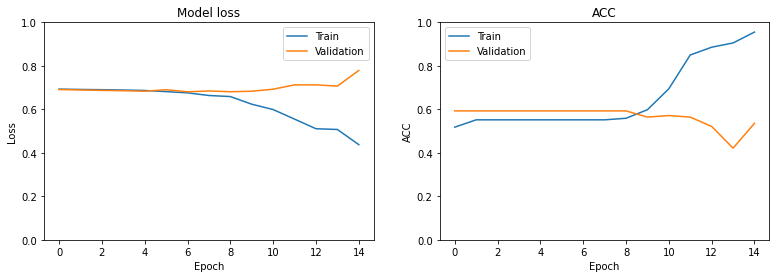

In [49]:
plot_loss(history, title=None)

In [50]:
results = model.evaluate(X_test_pad, y_test)

print('-'*80)
print(f"test score (MAPE): {results[1]:.3f}")
print('-'*80)

10/10 [==============================] - 1s 52ms/step - loss: 0.8111 - accuracy: 0.5267
--------------------------------------------------------------------------------
test score (MAPE): 0.527
--------------------------------------------------------------------------------
